## Download the Dataset

In [1]:
!mkdir -p ~/.kaggle
!kaggle datasets download -d divanshu22/gender-recognition-dataset
!unzip gender-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Validation/Male/189674.jpg  
  inflating: Validation/Male/189675.jpg  
  inflating: Validation/Male/189676.jpg  
  inflating: Validation/Male/189679.jpg  
  inflating: Validation/Male/189681.jpg  
  inflating: Validation/Male/189684.jpg  
  inflating: Validation/Male/189688.jpg  
  inflating: Validation/Male/189689.jpg  
  inflating: Validation/Male/189691.jpg  
  inflating: Validation/Male/189692.jpg  
  inflating: Validation/Male/189693.jpg  
  inflating: Validation/Male/189694.jpg  
  inflating: Validation/Male/189695.jpg  
  inflating: Validation/Male/189696.jpg  
  inflating: Validation/Male/189697.jpg  
  inflating: Validation/Male/189698.jpg  
  inflating: Validation/Male/189702.jpg  
  inflating: Validation/Male/189704.jpg  
  inflating: Validation/Male/189705.jpg  
  inflating: Validation/Male/189708.jpg  
  inflating: Validation/Male/189710.jpg  
  inflating: Validation/Male/189717.jpg  
  inflating: Validation/M

## Load and Preprocess the Dataset

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = "Train"
validation_data_dir = "Validation"

# Preprocess the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    shuffle=False)

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


## Define and Train the Model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5)

Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 992s 197ms/step - accuracy: 0.8615 - loss: 0.2862 - val_accuracy: 0.9665 - val_loss: 0.0919
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1001s 200ms/step - accuracy: 0.9617 - loss: 0.1044 - val_accuracy: 0.9721 - val_loss: 0.0758
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1004s 192ms/step - accuracy: 0.9671 - loss: 0.0930 - val_accuracy: 0.9724 - val_loss: 0.0962
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 971s 194ms/step - accuracy: 0.9665 - loss: 0.0962 - val_accuracy: 0.9718 - val_loss: 0.0790
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 997s 197ms/step - accuracy: 0.9689 - loss: 0.0905 - val_accuracy: 0.9716 - val_loss: 0.0868


## Evaluate the Model

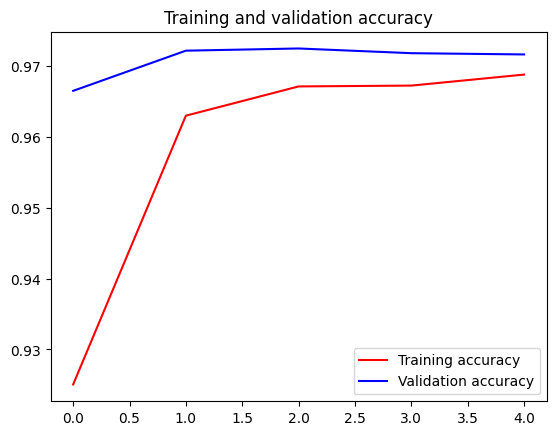

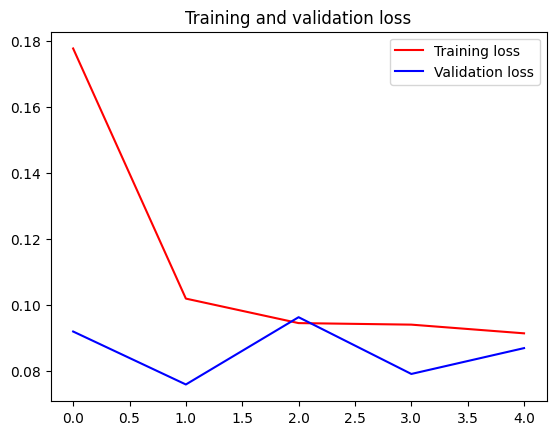

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Save and Load the Model

In [8]:
model.save('gender_recognition.h5')